In [1]:
%matplotlib inline

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib import colors, rc, animation
from IPython.display import set_matplotlib_formats, HTML, Image

set_matplotlib_formats('png', 'pdf')
rc('animation', html='html5')

In [3]:
sp.init_printing()

Ce module sert à simuler le comportement d'une corde, fixée à ses deux extrémités, homogène et inextensible que l'on fait vibrer, comme une corde d'un violon.

# Code: harmoniques (conditions aux bords homogènes)

In [31]:
class CordeHarmo:
    omega, x, t = sp.symbols("omega0 x t", real=True)
    cel = sp.symbols("c", real = True)
    N = sp.symbols("N", integer=True)
    m = sp.Idx("m", N)
    exprHarmo = sp.sin(m*omega*x/cel)*sp.cos(m*omega*t)
    
    def __init__(self, L, c):
        """L: longueur de la corde
        c: célérité de l'onde"""
        self.L = L
        self.cval = c
        self.dom = np.linspace(0, L, 100)
        puls = c*sp.pi/L
        x,t = self.x,self.t
        omega = self.omega
        cel,m = self.cel,self.m
        har = self.exprHarmo.subs({cel:c,omega:puls})
        self.harm  = har
        self.funcH = sp.lambdify((x,t,m), har, "numpy")
    
    @staticmethod
    def _legendeHarm(h):
        return r"$m = %d$" % h
    
    def plotHarmo(self, t, li):
        fig = plt.figure(1, figsize=(8,5))
        ax = fig.add_subplot(111)
        ax.grid(True)
        dom = self.dom
        
        if hasattr(li, '__iter__'):
            for m in li:
                lab = self._legendeHarm(m)
                valeurs = self.funcH(dom, t, m)
                ax.plot(dom,valeurs,label=lab)
        else:
            lab = self._legendeHarm(li)
            valeurs = self.funcH(dom, t, li)
            ax.plot(dom,valeurs, label=lab)
        ax.set_title(r"Harmoniques $m$")
        ax.legend()
        fig.tight_layout()
    
    @staticmethod
    def _limMargin(a,b):
        wind = np.absolute(b-a)
        return (a-.1*wind,b+.1*wind)
    
    def animateHarm(self, t0, t1, h):
        """Animation du h-ème harmonique"""
        dom = self.dom
        fig = plt.figure(2,figsize=(8,5))
        ax = fig.add_subplot(111)
        ax.grid(True)
        ax.set_xlabel("Position $x$ (m)")
        ax.set_ylabel("Altitude $y(x,t)$")
        ax.set_title("%d-ème harmonique" % h)
        
        fps=30
        animtime=10
        N = int(np.ceil(animtime*fps))
        timestep = (t1-t0)/N
        interv = 1000/fps
        
        # Valeurs
        func = self.funcH
        states=[func(dom,t0+i*timestep,h) for i in range(N)]
        self.record = states
        
        line, = ax.plot(dom,states[0])
        timetext = ax.text(0.1,0.95,
            r"$t=%f$" % t0,
            transform=ax.transAxes)
        # Fenêtre
        lims = (np.min(np.asarray(states)),
               np.max(np.asarray(states)))
        ax.set_ylim(self._limMargin(*lims))
        
        def update(i):
            ti = t0+i*timestep
            timetext.set_text(r"$t=%f$" % ti)
            line.set_data(dom,states[i])
            return line, timetext
        
        anim = animation.FuncAnimation(fig,
                update, frames=N,interval=interv,
                blit=True)
        self.anim_harm = anim

In [27]:
cor = CordeHarmo(1, 10)

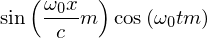

In [23]:
cor.harmo

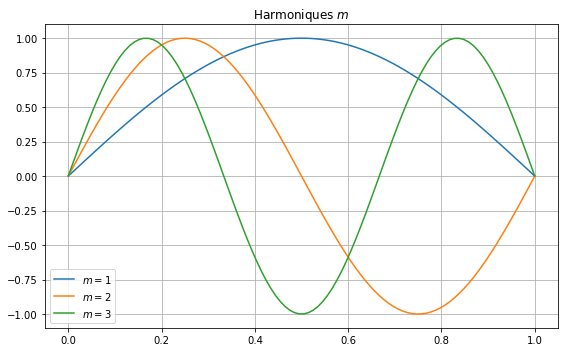

In [24]:
cor.plotHarmo(0, [1,2,3])

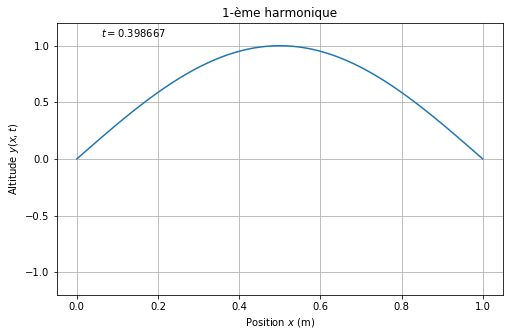

In [28]:
cor.animateHarm(0,0.4,1)

cor.anim_harm

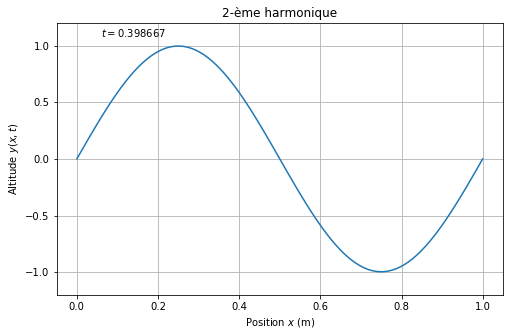

In [29]:
cor.animateHarm(0,0.4,2)

cor.anim_harm

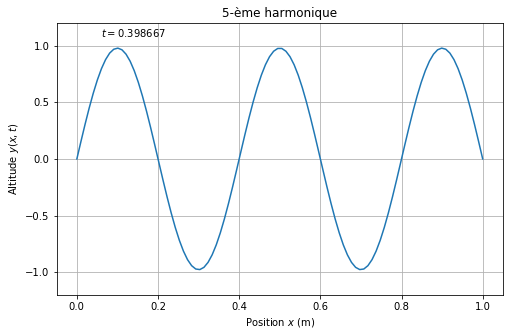

In [30]:
cor.animateHarm(0,0.4,5)
cor.anim_harm

In [76]:
class Corde(CordeHarmo):
    def __init__(self, L, c, coeffs):
        CordeHarmo.__init__(self, L, c)
        expr = sum(el*self.harm.subs({self.m:i}) for i,el in enumerate(coeffs))
        self.expr = expr
        func = sp.lambdify((self.x,self.t), expr, "numpy")
        self.func = func
        
    def plot(self, t):
        fig = plt.figure(3, figsize=(8,5))
        ax = fig.add_subplot(111)
        ax.grid(True)
        dom = self.dom
        valeurs = self.func(dom, t)
        ax.plot(dom, valeurs)
    
    @staticmethod
    def _limMargin(a,b):
        wind = np.absolute(b-a)
        return (a-.1*wind,b+.1*wind)
    
    def animate(self, t0, t1):
        dom = self.dom
        fig = plt.figure(2,figsize=(8,5))
        ax = fig.add_subplot(111)
        ax.grid(True)
        ax.set_xlabel("Position $x$ (m)")
        ax.set_ylabel("Altitude $y(x,t)$")
        ax.set_title("Corde")
        
        fps=30
        animtime=10
        N = int(np.ceil(animtime*fps))
        timestep = (t1-t0)/N
        interv = 1000/fps
        
        # Valeurs
        func = self.func
        states=[func(dom,t0+i*timestep) for i in range(N)]
        self.record = states
        
        line, = ax.plot(dom,states[0])
        timetext = ax.text(0.1,0.95,
            r"$t=%f$" % t0,
            transform=ax.transAxes)
        # Fenêtre
        lims = (np.min(np.asarray(states)),
               np.max(np.asarray(states)))
        ax.set_ylim(self._limMargin(*lims))
        
        def update(i):
            ti = t0+i*timestep
            timetext.set_text(r"$t=%f$" % ti)
            line.set_data(dom,states[i])
            return line, timetext
        
        anim = animation.FuncAnimation(fig,
                update, frames=N,interval=interv,
                blit=True)
        self.anim = anim

In [164]:
omega0 = 10*np.pi
def coeff(n):
    npi = n*np.pi
    return -2*np.sin(npi/2)/npi**2
coeffs = [coeff(n) for n in range(1,100)]

In [165]:
vibr = Corde(1,10, coeffs)

In [166]:
vibr.func(0.2,0.02)

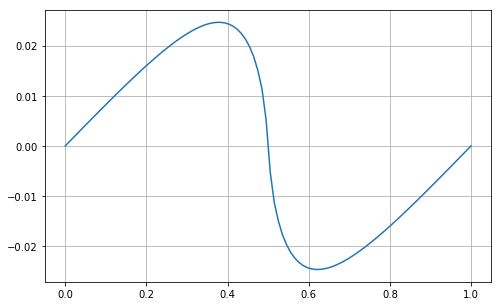

In [167]:
vibr.plot(0.2)

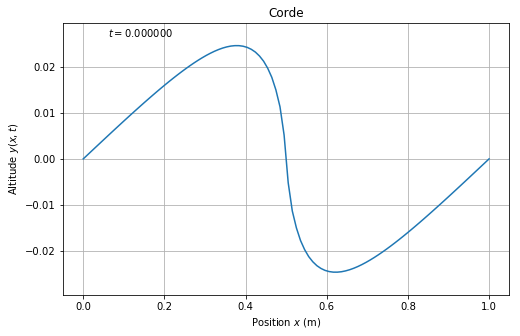

In [168]:
vibr.animate(0,5)

In [169]:
vibr.anim